In [4]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
from numpy import ndarray
import random

In [44]:
def experiment( device_num = 40):
    test_second = 30    
    hopping_rate = 1600 # 1600 hops per second
    hopping_times = test_second * hopping_rate
    No_noises_channels_num = 39
    noises_channels_num = 40
    probability = 0.5
    badchannel_num = np.random.poisson(noises_channels_num*probability)
    channel = [0] * 80
    for _ in range(badchannel_num):
        channel[random.randrange(1, noises_channels_num)] = 0   # assume 2 represent for bad channel
    collision_num = 0
    device= [[0] * hopping_times] * device_num
    total_channel_index_collision = [0] * 80
    channel_index_collision = [0] * 80
    record_badchannel = [0] *80
    for i in range(80):
            record_badchannel[i] = channel[i]
    for i in range(hopping_times) :
        for device_index in range(device_num) :
            # fetch channel
            fetch_channel = random.randrange(0, 79) + 1
            device[device_index][i] = fetch_channel
            # detect collision or bad channel
            if channel[fetch_channel] != 0:
                collision_num = collision_num + 1
                total_channel_index_collision[fetch_channel] += 1
                if (channel[fetch_channel] == 1): #collision
                    channel_index_collision[fetch_channel] += 1
            if channel[fetch_channel] == 0:
                channel[fetch_channel] = 1
            elif channel[fetch_channel] == 1:
                channel[fetch_channel] = 3
            elif channel[fetch_channel] == 2:
                channel[fetch_channel] = 4
        for i in range(80):
            channel[i] = record_badchannel[i]
    for i in range(79) :
        total_channel_index_collision[i+1] = channel_index_collision[i+1] / hopping_times
        channel_index_collision[i+1] = channel_index_collision[i+1] / hopping_times
    %matplotlib inline
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt

    index = [0]*80
    for i in range(79):
            index[i+1] = i+1
    del index[0]
    del total_channel_index_collision[0]
    pt = pd.DataFrame(
        {"channel id": index,
         "probability of collision": total_channel_index_collision
        }
    )
    sns.factorplot(data = pt, x="channel id", y="probability of collision", ci = None, size=10 ,kind="bar",aspect=2 )
    final_badchannel = [badchannel_num] * 9
    threshold = [0] * 10
    for i in range(9):
        threshold[i+1] = (i+1) / 10
    del(threshold[0])
    x = 0
    for j in threshold : 
        for i in range(79) :
            if channel_index_collision[i+1] > j :
                    final_badchannel[x] += 1
        x += 1
    pt = pd.DataFrame(
        {"threshold": threshold,
         "bad channel num": final_badchannel
        }
    )
    sns.factorplot(data = pt, x="threshold", y="bad channel num", ci = None, size=10 ,kind="bar",aspect=2 )

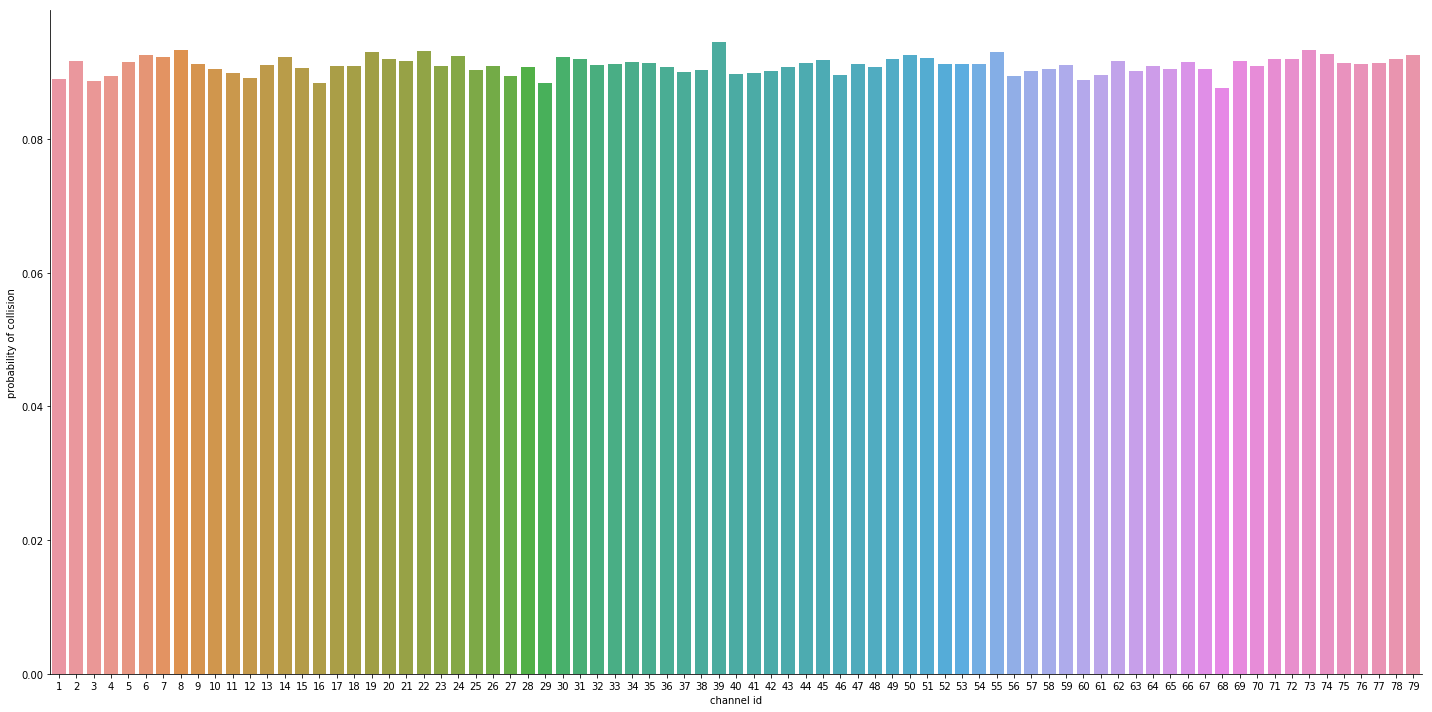

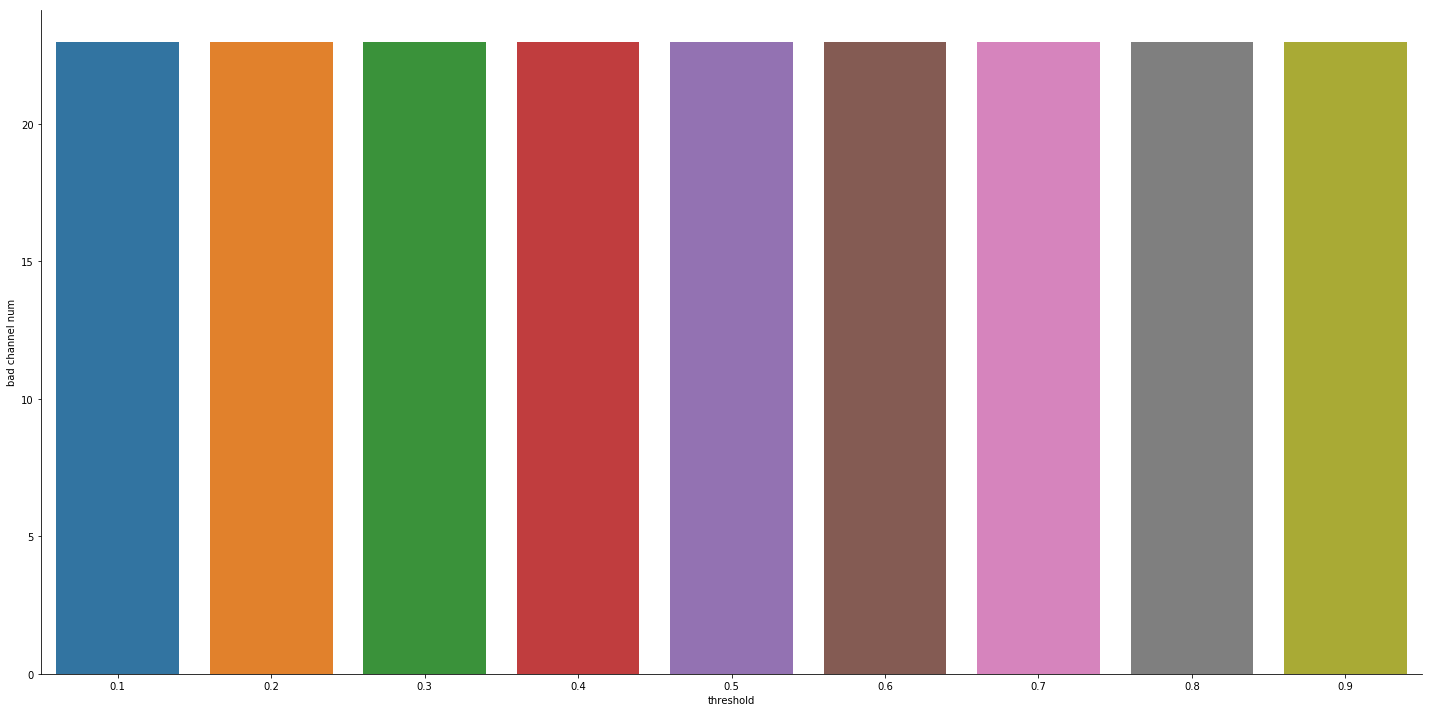

In [45]:
experiment(40)

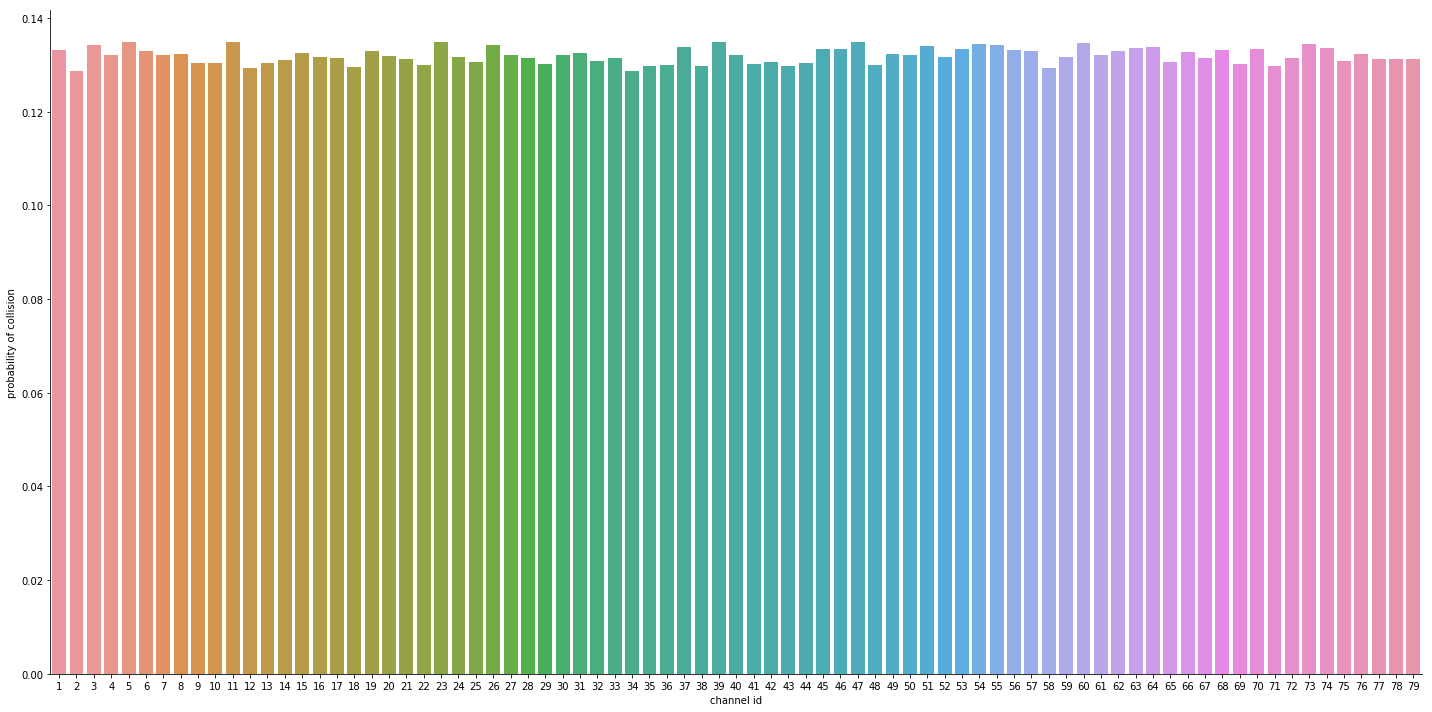

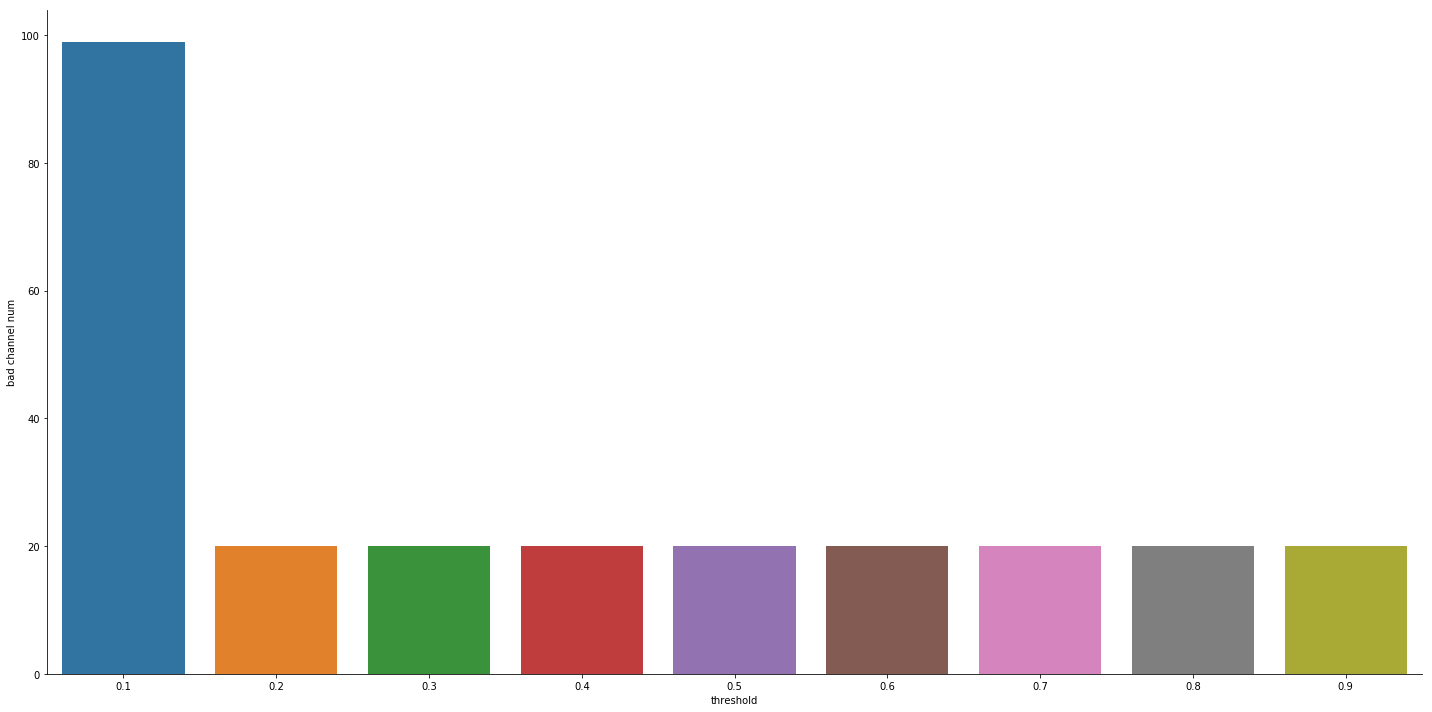

In [46]:
experiment(50)

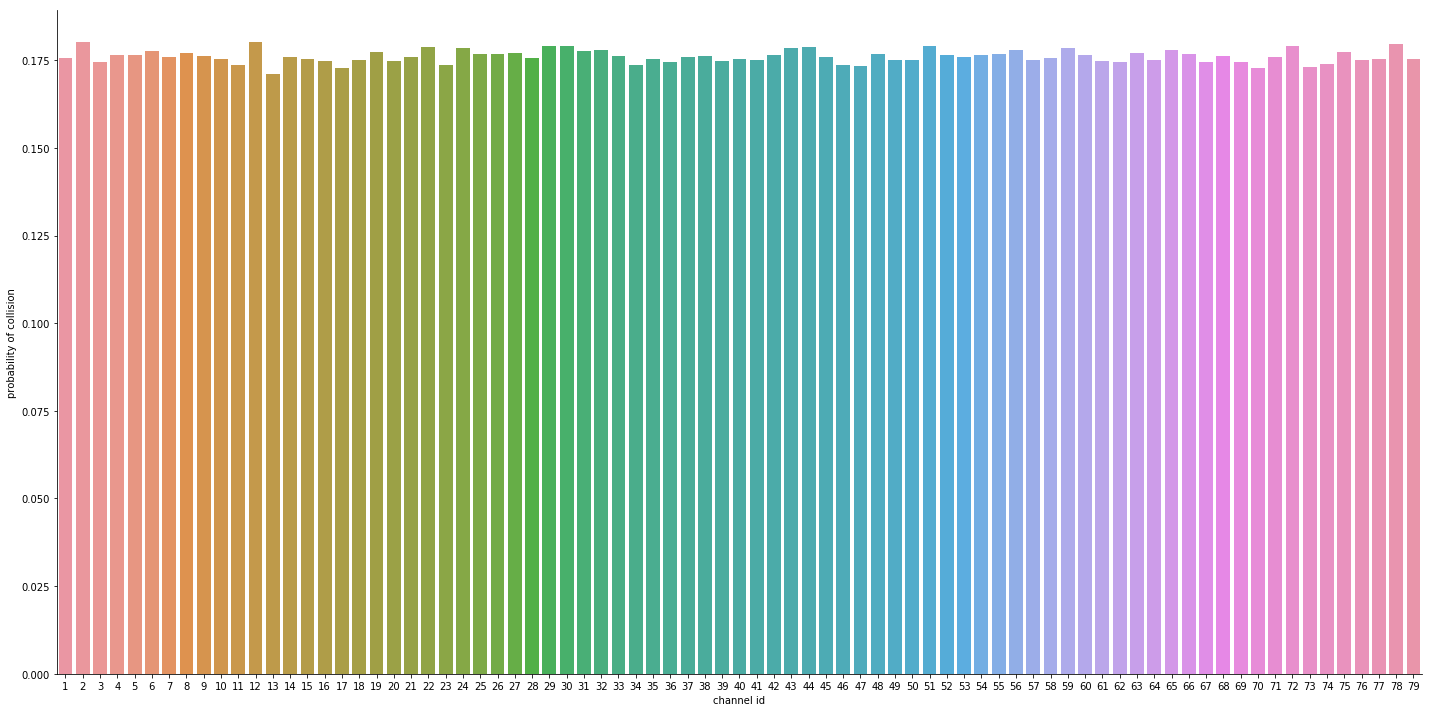

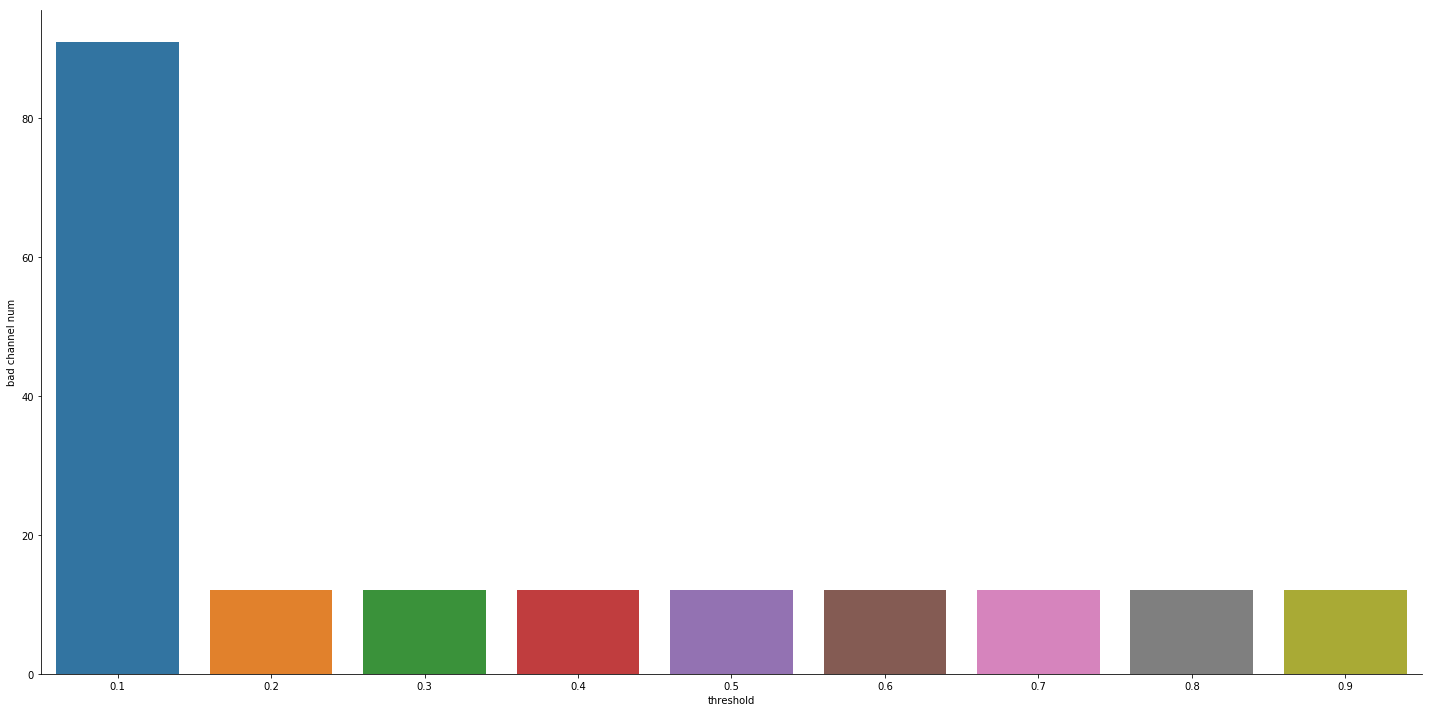

In [47]:
experiment(60)